激活函数通过计算加权和并加上偏置来确定神经元是否应该被激活。它们是将输入信号转换为输出的可微运算。大多数激活函数都是非线性的。由于激活函数是深度学习的基础，下面简要介绍一些常见的激活函数。

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l 

ReLU函数 线性整流单元

通俗地说，ReLU函数通过将相应的激活值设为0来仅保留正元素并丢弃所有负元素。为了直观感受一下，我们可以画出函数的曲线图。正如从图中所看到，激活函数是分段线性的。

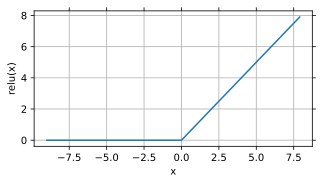

In [3]:
x =torch.arange(-9.0,8.0,0.1,requires_grad=True)
y =torch.relu(x)
d2l.plot(x.detach(),y.detach(),'x','relu(x)',figsize=(5,2.5))

当输入为负时，ReLU函数的导数为0，而当输入为正时，ReLU函数的导数为1。注意，当输入值精确等于0时，ReLU函数不可导。在此时，我们默认使用左侧的导数，即当输入为0时导数为0。我们可以忽略这种情况，因为输入可能永远都不会是0。这里用上一句古老的谚语，“如果微妙的边界条件很重要，我们很可能是在研究数学而非工程”，这个观点正好适用于这里。下面我们绘制ReLU函数的导数。

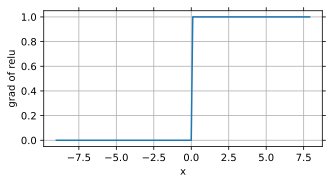

In [4]:
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of relu',figsize=(5,2.5))

使用ReLU的原因是，它求导表现得特别好：要么让参数消失，要么让参数通过。这使得优化表现得更好，并且ReLU减轻了困扰以往神经网络的梯度消失问题

sigmoid函数

对于一个定义域在 R 中的输入，sigmoid函数将输入变换为区间(0, 1)上的输出。因此，sigmoid通常称为挤压函数（squashing function）：它将范围(-inf, inf)中的任意输入压缩到区间(0, 1)中的某个值

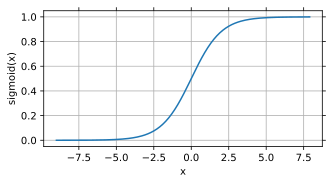

In [14]:
y=torch.sigmoid(x)
d2l.plot(x.detach(),y.detach(),'x','sigmoid(x)',figsize=(5,2.5))

sigmoid函数的导数图像如下所示。注意，当输入为0时，sigmoid函数的导数达到最大值0.25。而输入在任一方向上越远离0点，导数越接近0。

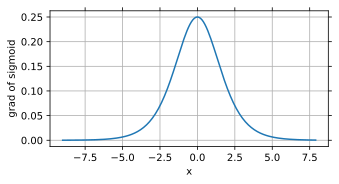

In [15]:
#清除之前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of sigmoid',figsize=(5,2.5))

tanh函数

与sigmoid函数类似，tanh(双曲正切)函数也能将其输入压缩转换到区间(-1, 1)上。下面我们绘制tanh函数。注意，当输入在0附近时，tanh函数接近线性变换。函数的形状类似于sigmoid函数，不同的是tanh函数关于坐标系原点中心对称。

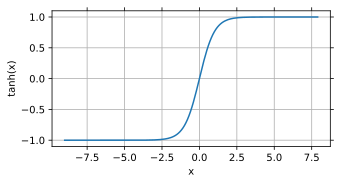

In [17]:
y =torch.tanh(x)
d2l.plot(x.detach(),y.detach(),'x','tanh(x)',figsize=(5,2.5))

tanh函数的导数图像如下所示。当输入接近0时，tanh函数的导数接近最大值1。与我们在sigmoid函数图像中看到的类似，输入在任一方向上越远离0点，导数越接近0。

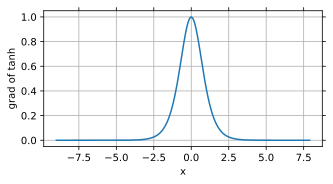

In [18]:
#清除之前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of tanh',figsize=(5,2.5))